In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import glob
import matplotlib as mpl
mpl.rcParams['figure.autolayout'] = True

In [2]:
def merge_processes(data,list_of_technologies):
    #data=data[data.Stf.isin(year_list)]
    columns = list(data.columns[4:])
    columns.append('Stf')
    columns.append('Process')
    plot_df = pd.DataFrame(columns=columns)
    for process in list_of_technologies:
        if process=='Photovoltaics':
            pro_df = data[(data.Process == 'Photovoltaics') | (data.Process == 'Photovoltaics-30') | (data.Process == 'Photovoltaics-40') | ( data.Process == 'Photovoltaics-50')].copy(deep=True)
            pro = pro_df.groupby(by='Stf', as_index=False).sum()
            pro['Process'] = 'Photovoltaics'
            plot_df=pd.concat([plot_df,pro],sort=False,ignore_index=True)
        elif process == 'Onshore wind':
            pro_df = data[(data.Process == 'Onshore wind') | (data.Process == 'Onshore wind-30') | (
                      data.Process == 'Onshore wind-40') | (data.Process == 'Onshore wind-50')].copy(deep=True)
            pro = pro_df.groupby(by='Stf', as_index=False).sum()
            pro['Process'] = 'Onshore wind'
            plot_df = pd.concat([plot_df, pro], sort=False,ignore_index=True)
        elif process == 'Offshore wind':
            pro_df = data[(data.Process == 'Offshore wind') | (data.Process == 'Offshore wind-30') | (
                      data.Process == 'Offshore wind-40')].copy(deep=True)
            pro = pro_df.groupby(by='Stf', as_index=False).sum()
            pro['Process'] = 'Offshore wind'
            plot_df = pd.concat([plot_df, pro], sort=False,ignore_index=True)
        elif process == 'Biogas':
            pro_df = data[(data.Process == 'Biogas') | ( data.Process == 'Biogas-40')].copy(deep=True)
            pro = pro_df.groupby(by='Stf', as_index=False).sum()
            pro['Process'] = 'Biogas'
            plot_df = pd.concat([plot_df, pro], sort=False,ignore_index=True)
        elif process == 'CCGT':
            pro_df = data[(data.Process == 'CCGT') | (data.Process == 'CCGT-30') | (
                  data.Process == 'CCGT-40')| (data.Process == 'CCGT-50')].copy(deep=True)
            pro = pro_df.groupby(by='Stf', as_index=False).sum()
            pro['Process'] = 'CCGT'
        elif process == 'Gas Turbine':
            pro_df = data[(data.Process == 'Gas Turbine') | (data.Process == 'Gas Turbine-30') | (
                  data.Process == 'Gas Turbine-40')| (data.Process == 'Gas Turbine-50')].copy(deep=True)
            pro = pro_df.groupby(by='Stf', as_index=False).sum()
            pro['Process'] = 'Gas Turbine'
            plot_df = pd.concat([plot_df, pro], sort=False,ignore_index=True)
        elif process == 'Gas':
            pro_df = data[(data.Process == 'CCGT') | (data.Process == 'CCGT-30') | (data.Process == 'CCGT-40') | (
                    data.Process == 'CCGT-50')|(data.Process == 'Gas Turbine') | (data.Process == 'Gas Turbine-30') | (
                    data.Process == 'Gas Turbine-40')| (data.Process == 'Gas Turbine-50')].copy(deep=True)
            pro = pro_df.groupby(by='Stf', as_index=False).sum()
            pro['Process'] = 'CCGT + GT'
            plot_df = pd.concat([plot_df, pro], sort=False,ignore_index=True)
        elif process == 'Coal':
            pro_df = data[(data.Process == 'Hard Coal') | ( data.Process == 'Hard Coal-30')|(
                data.Process == 'Lignite') | ( data.Process == 'Lignite-30')].copy(deep=True)
            pro = pro_df.groupby(by='Stf', as_index=False).sum()
            pro['Process'] = 'Hard Coal + Lignite'
        elif process == 'Hard Coal':
            pro_df = data[(data.Process == 'Hard Coal') | ( data.Process == 'Hard Coal-30')].copy(deep=True)
            pro = pro_df.groupby(by='Stf', as_index=False).sum()
            pro['Process'] = 'Hard Coal'
            plot_df = pd.concat([plot_df, pro], sort=False,ignore_index=True)
        elif process == 'Lignite':
            pro_df = data[(data.Process == 'Lignite') | ( data.Process == 'Lignite-30')].copy(deep=True)
            pro = pro_df.groupby(by='Stf', as_index=False).sum()
            pro['Process'] = 'Lignite'
            plot_df = pd.concat([plot_df, pro], sort=False,ignore_index=True)
        elif process == 'Bio Energy':
            pro_df = data[(data.Process == 'Biogas') | ( data.Process == 'Biogas-40')| ( data.Process == 'Biomass')].copy(deep=True)
            pro = pro_df.groupby(by='Stf', as_index=False).sum()
            pro['Process'] = 'Biogas + Biomass'
            plot_df = pd.concat([plot_df, pro], sort=False,ignore_index=True)
        else:
            pro_df= data[data.Process == process].copy(deep=True)
            pro=pro_df[columns]
            plot_df = pd.concat([plot_df, pro], sort=False,ignore_index=True)
    return plot_df

In [3]:
def tidy_data (df):
    data_set = df.copy(deep=True)
    data_set = data_set.reset_index(drop=True)
    data_set = data_set.melt(id_vars=["Stf", "Process"], var_name=["Optimization"], value_name="Capacities")
    data_set.loc[(data_set.Optimization == 'Minimum Cost'), 'Optimization'] = 'Min-0.0'
    data_set[['Objective', 'Slack']] = data_set.Optimization.str.split("-", expand=True)
    data_set.drop(columns='Optimization', inplace=True)
    data_set['Slack'] = data_set.Slack.astype(float)
    data_set['Slack'] = data_set['Slack'] * 100
    return data_set

In [4]:
slack_list= ['0.005','0.01','0.02','0.03','0.04','0.05','0.075','0.1']
commodities=  ['Elec','CO2','H2']
sites=['Germany']
scenario= 'EL_80'
stf=['2020','2030','2040','2040','2050']
list_of_technologies=['Photovoltaics','Onshore wind','Offshore wind','Bio Energy', 'Gas','CCS NGCC',
                      'Geothermal Powerplant',  'Electrolyzer', 'Fuelcell','Hydropower','Hard Coal',
                      'Lignite','Nuclear' ] 
#'Dummy Gas-CCGT','Dummy H2-CCGT', 'Dummy Gas-GT', 'Dummy H2-GT', 'CCGT','Gas Turbine','Slack PP', 'Curtailment','Biogas', 'Biomass'

In [5]:
filename_photo=r'C:\Users\Koyulatte\LRZ Sync+Share\near_optimal_run\result\Int-DE-w-crossover-sande-noassertPhotovoltaics-20200710T1113\capacities.xlsx'
with pd.ExcelFile(filename_photo) as xls:
    df_photo=xls.parse('Near-Optimal Process Capacities').ffill()
pro_cap=df_photo.copy(deep=True)
plot_cap = merge_processes(pro_cap, list_of_technologies)
df = tidy_data(plot_cap)
photovoltaics= df.copy(deep=True)
photovoltaics['obj']='Photovoltaics'
filename_ons=r'C:\Users\Koyulatte\LRZ Sync+Share\near_optimal_run\result\Int-DE-w-crossover-sande-noassertOnshorewind-20200727T1854\capacities.xlsx'
with pd.ExcelFile(filename_ons) as xls:
    df_ons=xls.parse('Near-Optimal Process Capacities').ffill()
pro_cap=df_ons.copy(deep=True)
plot_cap = merge_processes(pro_cap, list_of_technologies)
df = tidy_data(plot_cap)
onshore= df.copy(deep=True)
onshore['obj']='Onshore wind'
filename_off=r'C:\Users\Koyulatte\LRZ Sync+Share\near_optimal_run\result\Int-DE-w-crossover-sande-noassertOffshorewind-20200729T0636\capacities.xlsx'
with pd.ExcelFile(filename_off) as xls:
    df_off=xls.parse('Near-Optimal Process Capacities').ffill()
pro_cap=df_off.copy(deep=True)
plot_cap = merge_processes(pro_cap, list_of_technologies)
df = tidy_data(plot_cap)
offshore= df.copy(deep=True)
offshore['obj']='Offshore wind'
filename_gas=r'C:\Users\Koyulatte\LRZ Sync+Share\near_optimal_run\result\Int-DE-w-crossover-sande-noassert-el80-Gas-20200721T2152\capacities.xlsx'
with pd.ExcelFile(filename_gas) as xls:
    df_gas=xls.parse('Near-Optimal Process Capacities').ffill()
pro_cap=df_gas.copy(deep=True)
plot_cap = merge_processes(pro_cap, list_of_technologies)
df = tidy_data(plot_cap)
gas= df.copy(deep=True)
gas['obj']='CCGT + GT'
result_dir=r'C:\Users\Koyulatte\LRZ Sync+Share\near_optimal_run\result\result _plots\EL_80'
scenario_dfs=[photovoltaics,onshore,offshore,gas]

In [6]:
gas.head()

,Stf,Process,Capacities,Objective,Slack,obj
0,2020.0,Photovoltaics,49550.000000,Min,0.0,CCGT + GT
1,2030.0,Photovoltaics,73146.596907,Min,0.0,CCGT + GT
2,2040.0,Photovoltaics,183779.162763,Min,0.0,CCGT + GT
3,2050.0,Photovoltaics,250000.000000,Min,0.0,CCGT + GT
4,2020.0,Onshore wind,53405.000000,Min,0.0,CCGT + GT


In [7]:
#info_dict={'slack_list':slack_list,'commodities':commodities,'sites':sites,'stf':stf,'objective':objective}
com_sum_dict={}
time_series_dict={}
min_cost_ts={}


In [8]:
colors={'Tum-main-b': (0, 101, 189),'Tum-main-W': (255, 255, 255),
'Tum-main-K': (0, 0, 0),
'Tum-sec-db': (0, 82, 147),
'Tum-sec-b': (100, 160, 200),
'Tum-sec-lb': (152, 198, 234),
'Tum-sec-g': (153, 153, 153),
'Tum-acc-o': (227, 114, 34),
'Tum-acc-y': (162, 173, 0),
'Tum-acc-g': (218, 215, 203),
'Photovoltaics': (243, 174, 0),
'Onshore wind': (122, 179, 225),
'Offshore wind':(0, 0, 139),
'Gas':(139,69,19),
'Decoration': (128, 128, 128)}
def to_color(obj=None):
    if obj is None:
        obj = 'Tum-main-b'
    try:
        color = tuple(rgb / 255.0 for rgb in colors[obj])
    except KeyError:
        # random deterministic color
        import hashlib
        color = '#' + hashlib.sha1(obj.encode()).hexdigest()[-6:]
    return color

In [9]:
changing_cap_raw=['Photovoltaics','Onshore wind', 'Offshore wind', 'CCGT + GT']# ,'Electrolyzer','Biogas + Biomass'
constant_cap=['CCS NGCC', 'Geothermal Powerplant', 'Fuelcell','Hydropower', 'Hard Coal', 'Lignite', 'Nuclear']

In [10]:
print(changing_cap_raw)


['Photovoltaics', 'Onshore wind', 'Offshore wind', 'CCGT + GT']


In [11]:
objective_info= photovoltaics.obj.values[0]
print(objective_info)

Photovoltaics


C:\Users\Koyulatte\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)
C:\Users\Koyulatte\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
C:\Users\Koyulatte\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
C:\Users\Koyulatte\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that ar

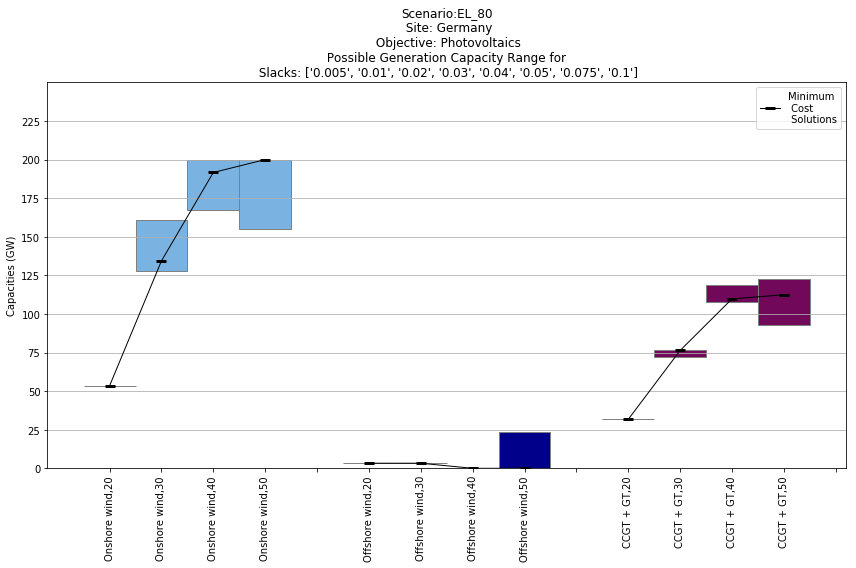

C:\Users\Koyulatte\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


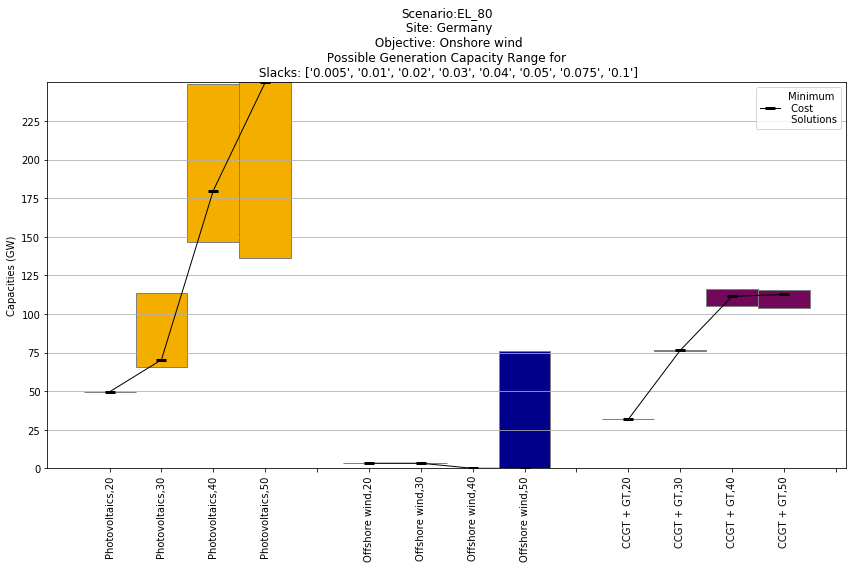

C:\Users\Koyulatte\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


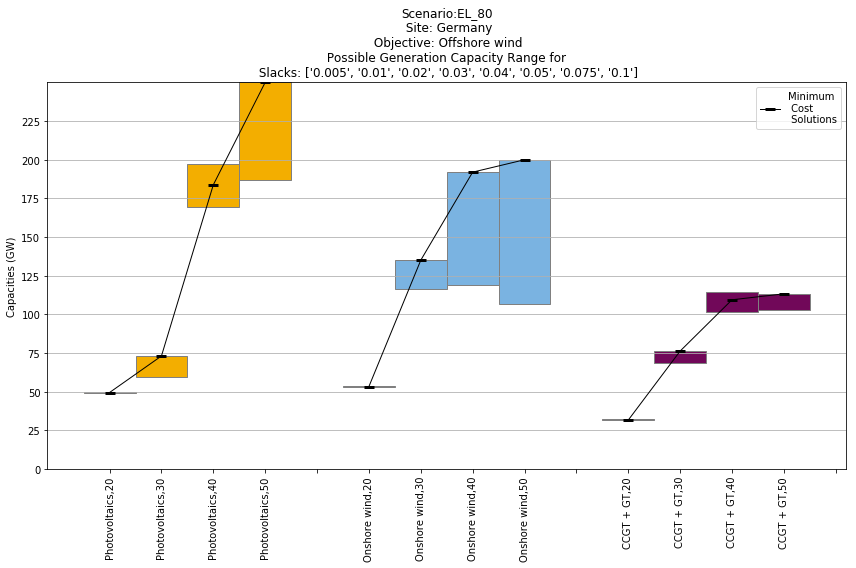

C:\Users\Koyulatte\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


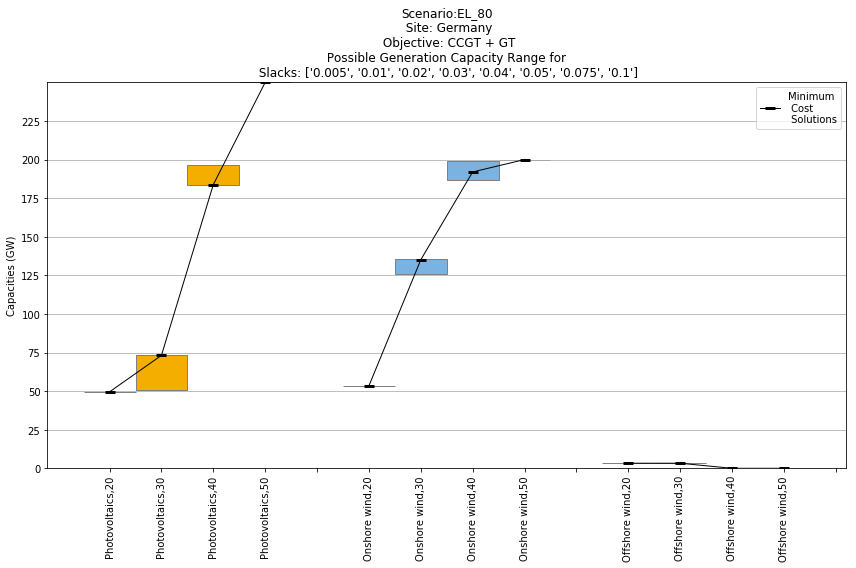

In [12]:
for df in scenario_dfs:
    objective_info= df.obj.values[0]
    changing_cap=changing_cap_raw.copy()
    changing_cap.remove(objective_info)
    df_cap_plot= df.copy(deep=True)
    df_cap_plot = df_cap_plot[df_cap_plot.Process.isin(changing_cap)]
    fig, ax = plt.subplots(figsize=(12,8))
    color_list=['Tum-main-b','Tum-sec-lb','Tum-main-b','Tum-sec-lb','Tum-main-b','Tum-sec-lb']
    axis_name_list=[]
    indices= tuple(range(1,(len(changing_cap)*5+1)))
    for i, item in enumerate(changing_cap):

            b=5*i
            x=[b+1,b+2,b +3,b+4]
            plot_df= df_cap_plot[df_cap_plot.Process == item].groupby('Stf').agg({"Process": {'pro':'first'},"Capacities": {"min": np.min, "max": np.max}})
            plot_df.columns=plot_df.columns.droplevel(0)
            plot_df=plot_df.reset_index()

            ax.bar(x,(plot_df['max']-plot_df['min'])/1000,width=1,bottom=(plot_df['min'])/1000,color=to_color(item),edgecolor=to_color('Decoration'))
            cost_min = df_cap_plot[(df_cap_plot.Process == item)&(df_cap_plot.Slack == 0)].copy(deep=True)
                #cost_min['Capacities_gw']=cost_min['Capacities']/1000
            line1,=ax.plot(x, (cost_min['Capacities'])/1000,marker="_", linewidth=1,markersize=10,color='k',markeredgecolor='k',markeredgewidth=3)

            ticks=[item+',20',item+',30',item+',40',item+',50','']
            axis_name_list.extend(ticks)
    ax.set_ylim(0,250)
    ax.set_yticks(np.arange(0,250,25))
    ax.set_xticks(indices)
    ax.set_xticklabels(axis_name_list)
    plt.xticks(rotation=90)
    ax.legend([line1], ['Minimum \n Cost \n Solutions'], loc=1)
    #plt.legend()
    ax.grid(axis='y')
    ax.set_ylabel('Capacities (GW)')
    ax.set_title(
        'Scenario:'+scenario+ '\n Site: Germany' + '\n Objective: '+
        objective_info + '\n Possible Generation Capacity Range for \n Slacks: ' + 
        str(slack_list))
    fig_filename = os.path.join(result_dir,objective_info+'others_box_env.png')
    fig.savefig(fig_filename, bbox_inches='tight')

year=2050

df_cap_plot= df[df.Stf==year].copy(deep=True)
df_cap_plot = df_cap_plot[df_cap_plot.Process.isin(changing_cap)]

fig, ax = plt.subplots(figsize=(12,8))

for i, item in enumerate(changing_cap):
    x = [i, i]
    y = [df_cap_plot[df_cap_plot.Process == item].Capacities.min()/1000, df_cap_plot[df_cap_plot.Process == item].Capacities.max()/1000]
    ax.plot(x, y, 'o-', linewidth=3, markersize=8, color='slategray', zorder=0)
    plt.text(x[0]+0.1,y[0]-1,"{:.2f} GW".format(df_cap_plot[df_cap_plot.Process == item].Capacities.min()/1000))
    plt.text(x[0]+0.1,y[1]+1,"{:.2f} GW".format(df_cap_plot[df_cap_plot.Process == item].Capacities.max()/1000))
# sns.boxplot(x='Process',y='Capacities',data=df_g,order=changing_cap,whis=0,fliersize=0,ax=ax,color='cornflowerblue',zorder=5)
cost_min = df_cap_plot[df_cap_plot.Slack == 0].copy(deep=True)
cost_min['Capacities_gw']=cost_min['Capacities']/1000
sns.pointplot(x='Process', y='Capacities_gw', data=cost_min, order=changing_cap, ci=0, join=False, ax=ax, color='k',
              zorder=10)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

ax.grid()
ax.set_ylabel('Capacities (GW)')
ax.set_title(
    'Scenario:'+scenario+ '\n Site: Germany' + '\n Objective: '+str(info_dict['objective'] )+ '\n Year: '+ str(year) + '\n Generation Capacity Range for \n Slacks: ' + str(info_dict['slack_list'] ))
fig_filename = os.path.join(result_dir,'changing_generation_capacities.png')
#fig.savefig(fig_filename, bbox_inches='tight')
#plt.close(fig)


import numpy as np
chg=['A','B','C']
indices=list(range(1,len(chg)))
print(indices)

fig,ax1=plt.subplots(figsize=(12,8))
ind=list(range(1,len(changing_cap)))
barwidth = 0.7 
axes=[ax1,ax2]
year=2050

df_cap_plot= df[df.Stf==year].copy(deep=True)
df_cap_plot = df_cap_plot[df_cap_plot.Process.isin(changing_cap)]

fig, ax = plt.subplots(figsize=(12,8))

ax1.bar(ind,min_dict['cp'],barwidth,bottom=min_dict['lp'], color=to_color('Coal plant'))

C:\Users\Koyulatte\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
C:\Users\Koyulatte\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


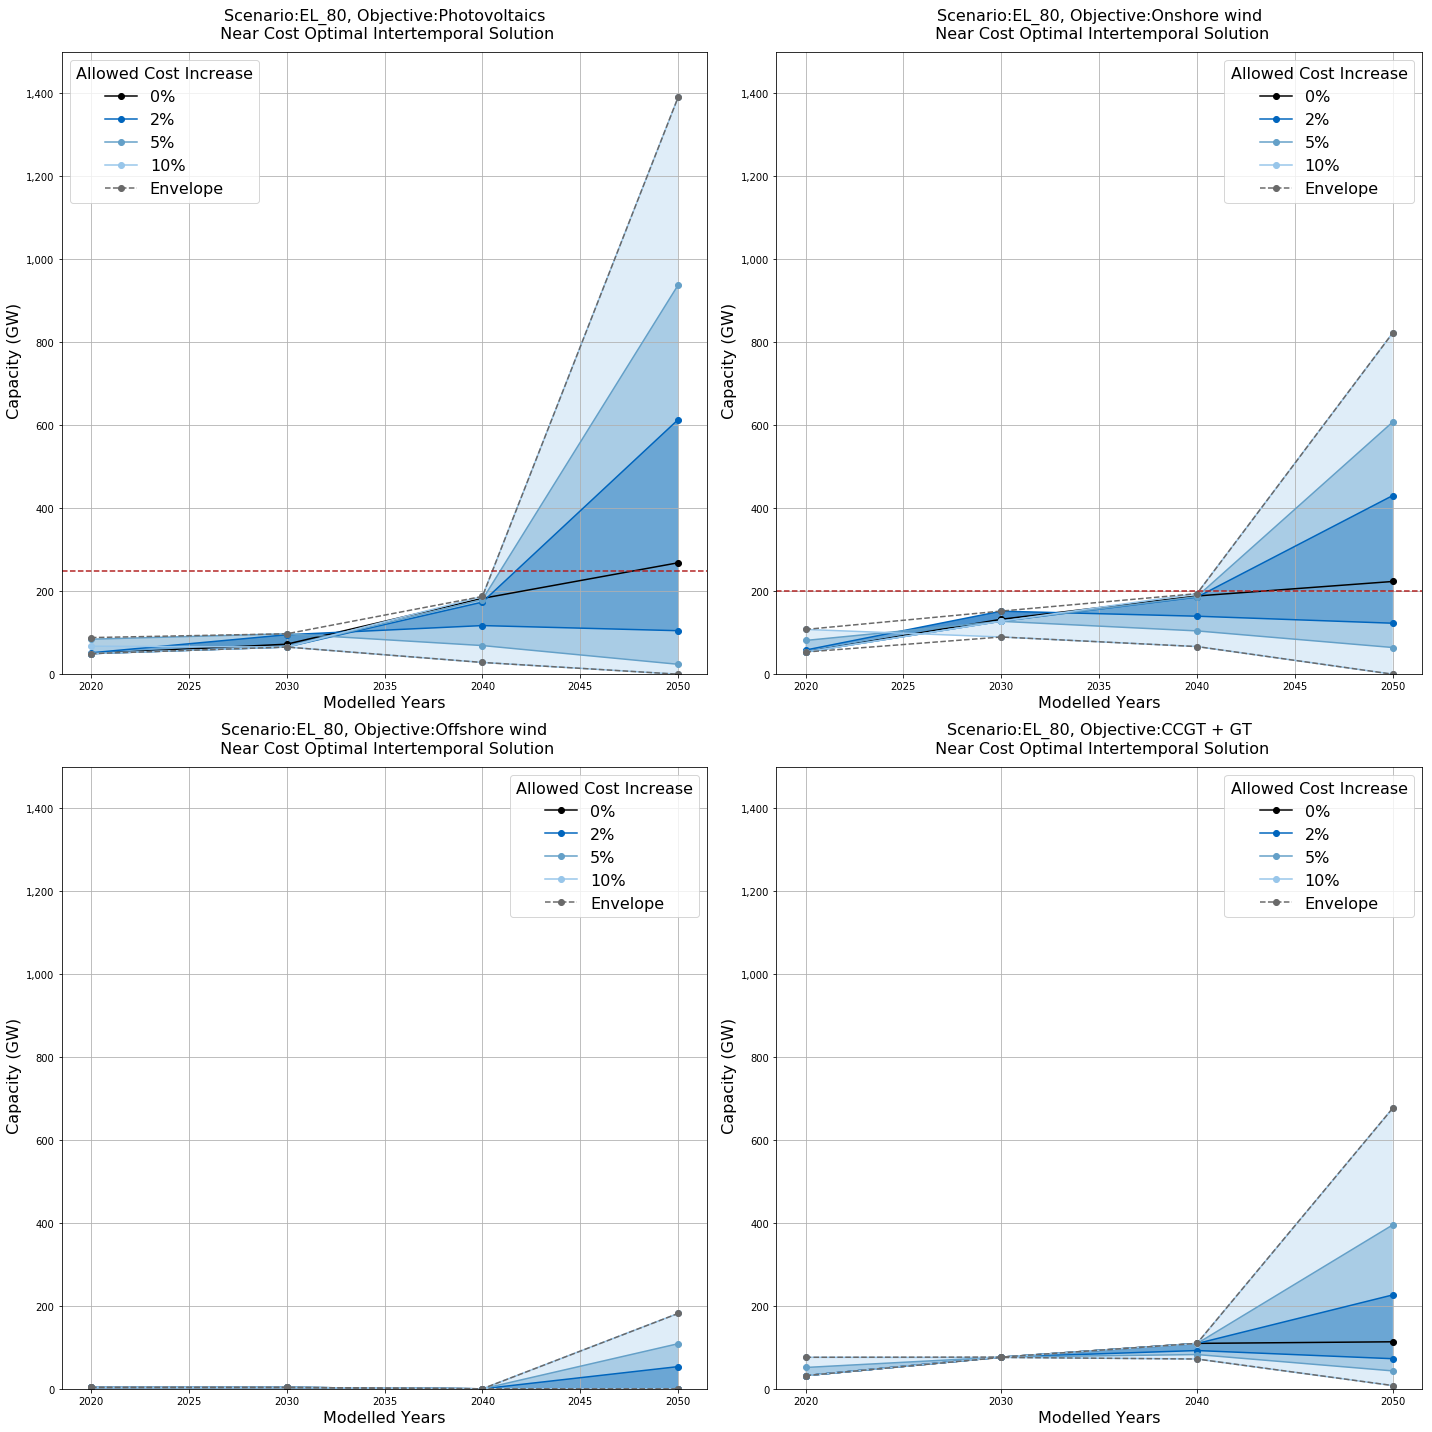

In [14]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(20,20))
axes=[ax1,ax2,ax3,ax4]
for j,df in enumerate(scenario_dfs):
    ax=axes[j]
    objective_info= df.obj.values[0]
    changing_cap=changing_cap_raw.copy()
    changing_cap.remove(objective_info)
    
    slack_to_plot=[0,2,5,10]

    df_line_plot= df[df.Process == objective_info].copy(deep=True)
    plot_df= df_line_plot.groupby('Stf').agg({"Capacities": {"min": np.min, "max": np.max}})
    plot_df.columns=plot_df.columns.droplevel(0)
    plot_df=plot_df.reset_index()
    data1 = df_line_plot[df_line_plot.Objective=='Min']
    data2 = df_line_plot[df_line_plot.Objective == 'Max']

    color_list = ['Tum-main-K',
                  'Tum-main-b',
                  'Tum-sec-b',
                  'Tum-sec-lb',
                  'Tum-acc-o',
                  'Tum-acc-y',
                  'Tum-sec-db',
                  'Tum-acc-g']
    for i, sl in enumerate(sorted(slack_to_plot)):
        line1, = ax.plot('Stf', 'Capacities', data=data1[data1.Slack == sl], color=to_color(color_list[i]),
                         label='{}%'.format(sl), marker='o')
        line2, = ax.plot('Stf', 'Capacities', data=data2[data2.Slack == sl], color=to_color(color_list[i]),
                         label='_{}%'.format(sl), marker='o')
        if not sl==0:
            ax.fill_between(data1[data1.Slack == sl].Stf, data1[data1.Slack == sl].Capacities,
                            data2[data2.Slack == sl].Capacities,
                            facecolor=to_color(color_list[i]), alpha=0.9-(i*2/10))

    line3, = ax.plot('Stf', 'min', data=plot_df, color='dimgray', label='Envelope', marker='o',linestyle='--')
    line4, = ax.plot('Stf', 'max', data=plot_df, color='dimgray', label='_Envelope',marker='o',linestyle='--')
    ax.legend(loc='best', title='Allowed Cost Increase',fontsize=16,title_fontsize=16)
    ax.grid()
    ax.set_xlabel('Modelled Years', fontsize=16)
    plt.xticks(list(data1.Stf.unique()), list(str(int(x)) for x in list(data1.Stf.unique())))
    ax.set_ylabel(' Capacity (GW)', fontsize=16)
    ax.set_title('Scenario:'+scenario+ ', Objective:'+objective_info+'\n Near Cost Optimal Intertemporal Solution', fontsize=16,
                 pad=15)  #
    ax.set_ylim(0, 1500000)
    ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x) // 1000, ',')))
    if objective_info=='Photovoltaics':
        ax.axhline(y=250000,color='firebrick',linestyle='--')
    elif objective_info=='Onshore wind':
        ax.axhline(y=200000,color='firebrick',linestyle='--')
    elif objective_info=='Onshore wind':
        ax.axhline(y=80000,color='firebrick',linestyle='--')
fig_filename = os.path.join(result_dir,'envelope.png')
fig.savefig(fig_filename, bbox_inches='tight')

    #plt.close(fig)



C:\Users\Koyulatte\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
C:\Users\Koyulatte\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


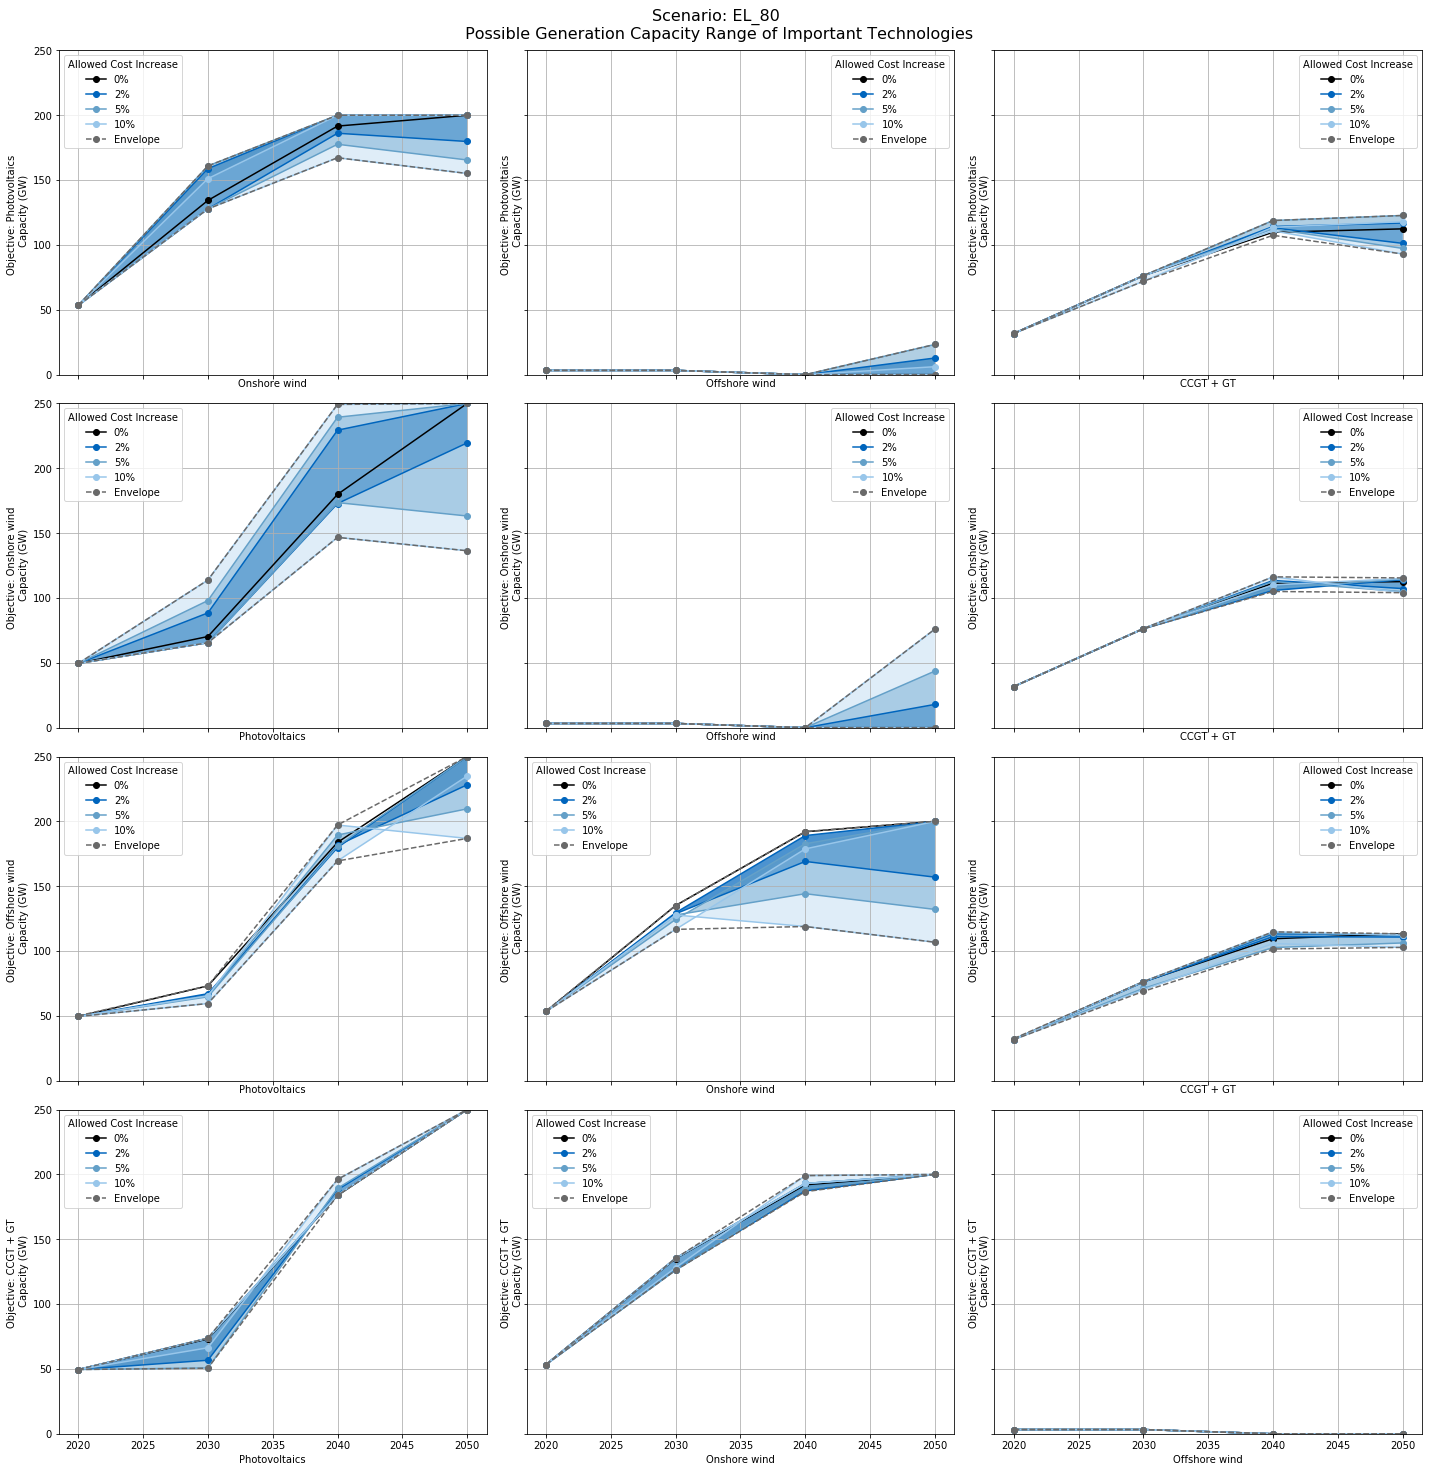

In [43]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12)) = plt.subplots(4,3,figsize=(20,20),sharex=True, sharey=True)
axes_all=[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12]
for k,df in enumerate(scenario_dfs):
    axes=axes_all[k*3:k*3+3]
    objective_info= df.obj.values[0]
    changing_cap=changing_cap_raw.copy()
    changing_cap.remove(objective_info)
  
    slack_to_plot=[0,2,5,10]

    df_cap_plot= df.copy(deep=True)
    df_cap_plot = df_cap_plot[df_cap_plot.Process.isin(changing_cap)]
    color_list = ['Tum-main-K',
                  'Tum-main-b',
                  'Tum-sec-b',
                  'Tum-sec-lb',
                  'Tum-acc-o',
                  'Tum-acc-y',
                  'Tum-sec-db',
                  'Tum-acc-g']
    for j, item in enumerate(changing_cap):
        ax=axes[j]
        plot_df= df_cap_plot[df_cap_plot.Process == item].groupby('Stf').agg({"Capacities": {"min": np.min, "max": np.max}})
        plot_df.columns=plot_df.columns.droplevel(0)
        plot_df=plot_df.reset_index()
        df_line_plot=df_cap_plot[df_cap_plot.Process == item].copy(deep=True)
        data1 = df_line_plot[df_line_plot.Objective=='Min']
        data2 = df_line_plot[df_line_plot.Objective == 'Max']
        for i, sl in enumerate(sorted(slack_to_plot)):
            line1, = ax.plot('Stf', 'Capacities', data=data1[data1.Slack == sl], color=to_color(color_list[i]),
                         label='{}%'.format(sl), marker='o')
            line2, = ax.plot('Stf', 'Capacities', data=data2[data2.Slack == sl], color=to_color(color_list[i]),
                         label='_{}%'.format(sl), marker='o')
            if not sl==0:
                   ax.fill_between(data1[data1.Slack == sl].Stf, data1[data1.Slack == sl].Capacities,
                           data2[data2.Slack == sl].Capacities,
                            facecolor=to_color(color_list[i]), alpha=0.9-(i*2/10))

        line3, = ax.plot('Stf', 'min', data=plot_df, color='dimgray', label='Envelope', marker='o',linestyle='--')
        line4, = ax.plot('Stf', 'max', data=plot_df, color='dimgray', label='_Envelope',marker='o',linestyle='--')
        ax.legend(loc='best', title='Allowed Cost Increase')
        ax.grid()
        ax.set_xlabel(item)
        ax.set_xticks(list(data1.Stf.unique()), list(str(int(x)) for x in list(data1.Stf.unique())))
        ax.set_ylabel('Objective: '+ objective_info + ' \n Capacity (GW)')
        #ax.set_title('Scenario:'+scenario+ '\n Near Cost Optimal Intertemporal Solution', fontsize=16,
         #        pad=15)  #
        ax.set_ylim(0, 250000)
        ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x) // 1000, ',')))

plt.suptitle('Scenario: '+scenario+ '\n Possible Generation Capacity Range of Important Technologies',y=1.02,fontsize=16 )
         #        pad=15) 
fig_filename = os.path.join(result_dir,'Other_technologies_envelope_plot.png')
fig.savefig(fig_filename, bbox_inches='tight')

    #plt.close(fig)


C:\Users\Koyulatte\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
C:\Users\Koyulatte\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


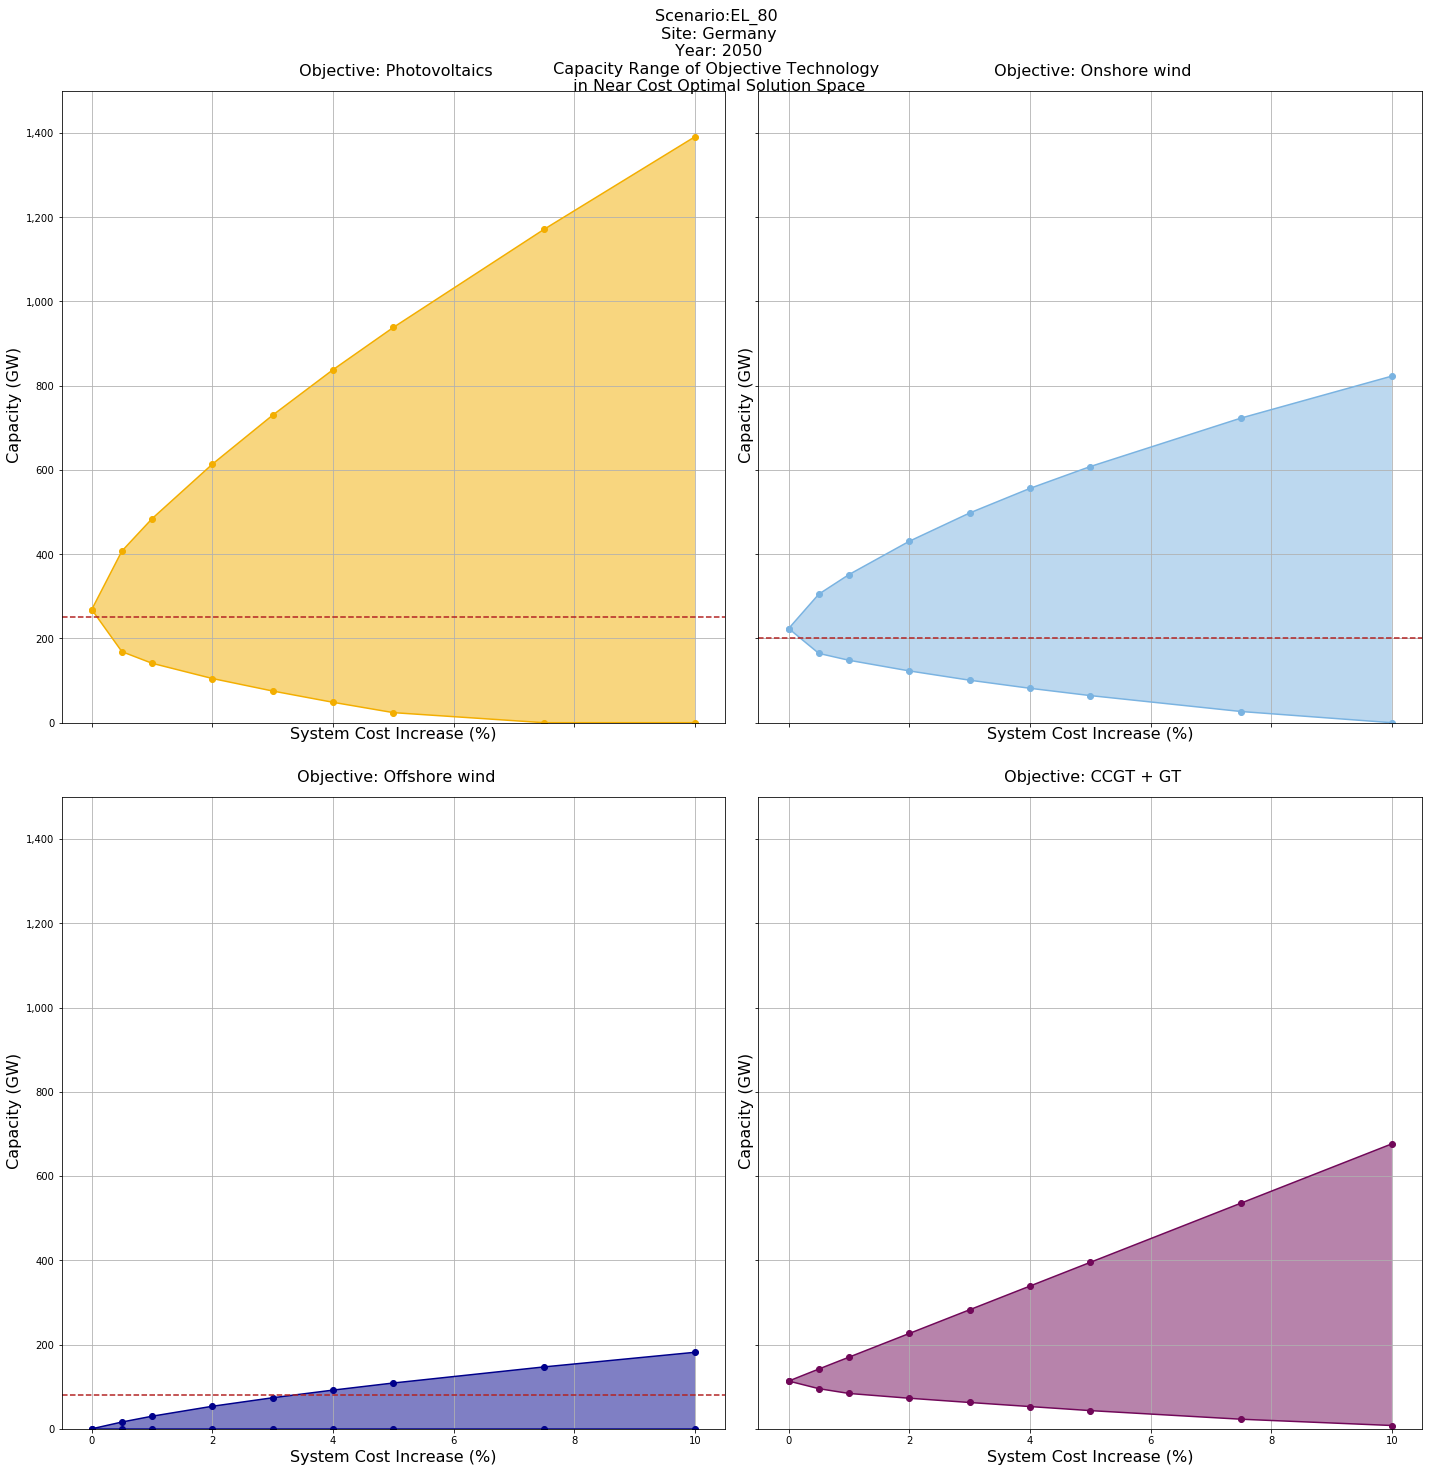

In [44]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(20,20), sharex=True,sharey=True)
axes=[ax1,ax2,ax3,ax4]
for j,df in enumerate(scenario_dfs):
    ax=axes[j]
    objective_info= df.obj.values[0]
    changing_cap=changing_cap_raw.copy()
    changing_cap.remove(objective_info)   
    year= 2050

    df_objective_plot= df[(df.Process == objective_info) & (df.Stf==year)].copy(deep=True)

    data1 = df_objective_plot[df_objective_plot.Objective=='Min']
    data2 = df_objective_plot[(df_objective_plot.Objective == 'Max')|(df_objective_plot.Slack==0)]
    color_list = ['Tum-main-K',
                  'Tum-main-b',
                  'Tum-sec-b',
                  'Tum-sec-lb',
                  'Tum-acc-o',
                  'Tum-acc-y',
                  'Tum-sec-db',
                  'Tum-acc-g']

    line1, = ax.plot('Slack', 'Capacities', data=data1, color=to_color(objective_info),
                          label='Minimize',marker='o')
    line2, = ax.plot('Slack', 'Capacities', data=data2, color=to_color(objective_info),
                        label='Maximize',marker='o')

    ax.fill_between(data1.Slack, data1.Capacities,
                            data2.Capacities,
                            facecolor=to_color(objective_info), alpha=0.5)

    #ax.legend(loc='best', title='Objective')
    ax.grid()
    ax.set_xlabel('System Cost Increase (%)', fontsize=16)
    #plt.xticks(list(data1.Slack.unique()), list(str(int(x)) for x in list(data1.Stf.unique())))
    ax.set_ylabel(' Capacity (GW)', fontsize=16)
    ax.set_title( '\n Objective: '+objective_info, fontsize=16,pad=15)  #
    ax.set_ylim(0, 1500000)
    ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x) // 1000, ',')))
    if objective_info=='Photovoltaics':
        ax.axhline(y=250000,color='firebrick',linestyle='--')
    elif objective_info=='Onshore wind':
        ax.axhline(y=200000,color='firebrick',linestyle='--')
    elif objective_info=='Offshore wind':
        ax.axhline(y=80000,color='firebrick',linestyle='--')
    fig_filename = os.path.join(result_dir,'Objected_capacity_2050.png')
    #fig.savefig(fig_filename, bbox_inches='tight')
    #plt.close(fig)
plt.suptitle('Scenario:'+scenario+ '\n Site: Germany' + '\n Year: '+ str(year) + '\n Capacity Range of Objective Technology \n in Near Cost Optimal Solution Space',y=1.02,fontsize=16 )
         #        pad=15) 
fig_filename = os.path.join(result_dir,'Other_technologies_envelope_plot.png')
fig.savefig(fig_filename, bbox_inches='tight')


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['figure.autolayout'] = True

## COST ANALYSIS

In [ ]:
filename_photo=r'C:\Users\Koyulatte\LRZ Sync+Share\near_optimal_run\result\Int-DE-w-crossover-sande-noassertPhotovoltaics-20200710T1113\capacities.xlsx'
with pd.ExcelFile(filename_photo) as xls:
    df_photo=xls.parse('Near-Optimal Process Capacities').ffill()
pro_cap=df_photo.copy(deep=True)
plot_cap = merge_processes(pro_cap, list_of_technologies)
df = tidy_data(plot_cap)
photovoltaics= df.copy(deep=True)
photovoltaics['obj']='Photovoltaics'
filename_ons=r'C:\Users\Koyulatte\LRZ Sync+Share\near_optimal_run\result\Int-DE-w-crossover-sande-noassertOnshorewind-20200727T1854\capacities.xlsx'
with pd.ExcelFile(filename_ons) as xls:
    df_ons=xls.parse('Near-Optimal Process Capacities').ffill()
pro_cap=df_ons.copy(deep=True)
plot_cap = merge_processes(pro_cap, list_of_technologies)
df = tidy_data(plot_cap)
onshore= df.copy(deep=True)
onshore['obj']='Onshore wind'
filename_off=r'C:\Users\Koyulatte\LRZ Sync+Share\near_optimal_run\result\Int-DE-w-crossover-sande-noassertOffshorewind-20200729T0636\capacities.xlsx'
with pd.ExcelFile(filename_off) as xls:
    df_off=xls.parse('Near-Optimal Process Capacities').ffill()
pro_cap=df_off.copy(deep=True)
plot_cap = merge_processes(pro_cap, list_of_technologies)
df = tidy_data(plot_cap)
offshore= df.copy(deep=True)
offshore['obj']='Offshore wind'
filename_gas=r'C:\Users\Koyulatte\LRZ Sync+Share\near_optimal_run\result\Int-DE-w-crossover-sande-noassert-el80-Gas-20200721T2152\capacities.xlsx'
with pd.ExcelFile(filename_gas) as xls:
    df_gas=xls.parse('Near-Optimal Process Capacities').ffill()
pro_cap=df_gas.copy(deep=True)
plot_cap = merge_processes(pro_cap, list_of_technologies)
df = tidy_data(plot_cap)
gas= df.copy(deep=True)
gas['obj']='CCGT + GT'
result_dir=r'C:\Users\Koyulatte\LRZ Sync+Share\near_optimal_run\result\result _plots\EL_80'
scenario_dfs=[photovoltaics,onshore,offshore,gas]

In [4]:
aaa

134.0

Text(0.5, 1.0, 'Demand Development Assumptions for Scenarios')

C:\Users\Koyulatte\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


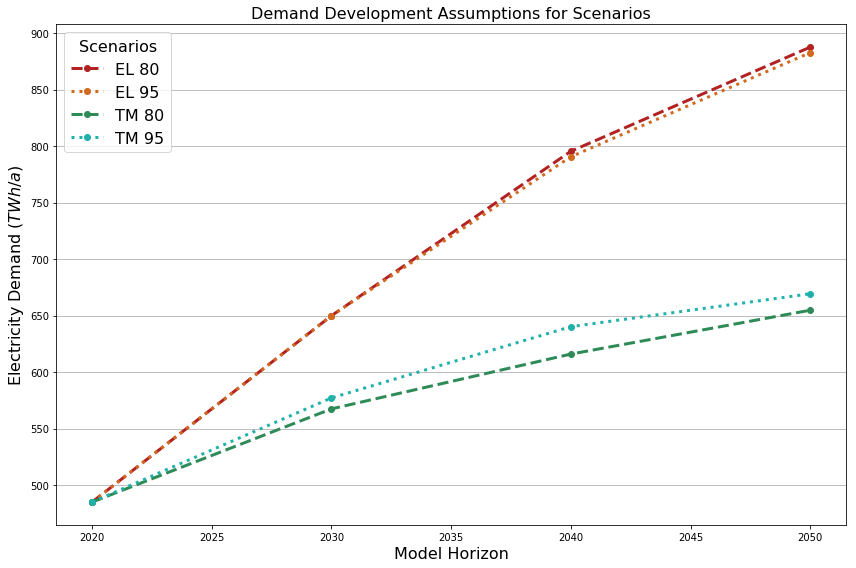

In [70]:
#Demand Plots
base=484983060.5000
EL_80=[base,base*1.34, base*1.64, base*1.83]
EL_80= [round(number/1000000,3) for number in EL_80]
EL_95=[base,base*1.34, base*1.63, base*1.82]
EL_95 = [round(number/1000000,3) for number in EL_95]
TM_80=[base,base*1.17, base*1.27, base*1.35]
TM_80 = [round(number/1000000,3) for number in TM_80]
TM_95=[base,base*1.19, base*1.32, base*1.38]
TM_95 = [round(number/1000000,3) for number in TM_95]
x=[2020,2030,2040,2050]
fig,ax=plt.subplots(figsize=(12, 8))
line1,=ax.plot(x,EL_80, color='firebrick', label='EL 80',marker='o',linestyle='--',linewidth=3)
line2,=ax.plot(x,EL_95, color='chocolate', label='EL 95',marker='o',linestyle=':',linewidth=3)
line3,=ax.plot(x,TM_80, color='seagreen', label='TM 80',marker='o',linestyle='--',linewidth=3)
line4,=ax.plot(x,TM_95, color='lightseagreen', label='TM 95',marker='o',linestyle=':',linewidth=3)
ax.grid(axis='y')
#ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x) // 1000, ',')))
ax.legend(loc='best', title='Scenarios', fontsize=16,title_fontsize=16)
ax.set_ylabel('Electricity Demand ($TWh/a$)', fontsize=16)
ax.set_xlabel('Model Horizon', fontsize=16)
ax.set_title('Demand Development Assumptions for Scenarios',fontsize=16)


Text(0.5, 1.0, 'Budget Calculation for Scenarios')

C:\Users\Koyulatte\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


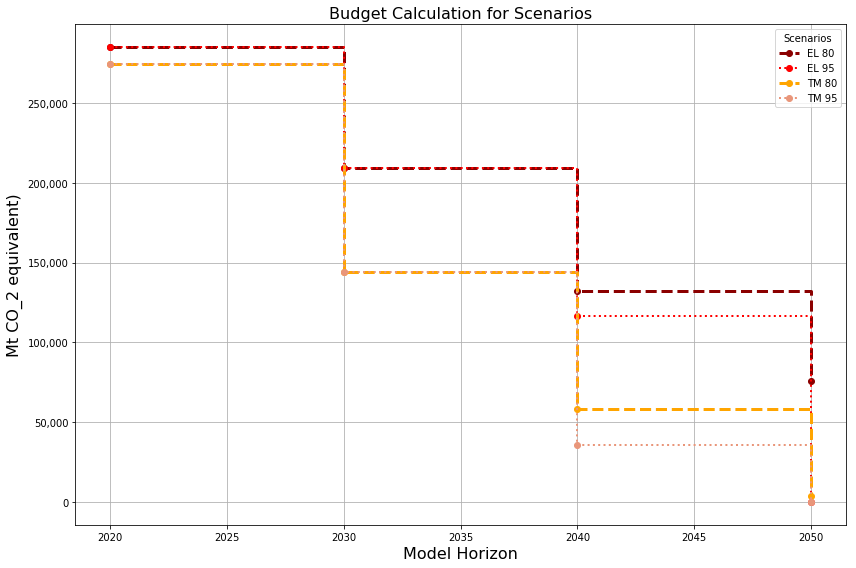

In [45]:
#Budget Plots
base=1248000000
EL_80=[(319/838)*(1-0.4)*base,(319/838)*(1-0.4)*base,
       (209/561)*(1-0.55)*base,(209/561)*(1-0.55)*base,
       (132/374)*(1-0.70)*base,(132/374)*(1-0.70)*base, (76/250)*(1-0.80)*base]
EL_95=[(319/838)*(1-0.4)*base,(319/838)*(1-0.4)*base,
       (209/561)*(1-0.55) *base,(209/561)*(1-0.55) *base,
       (114 / 305) * (1 - 0.75) *base, (114 / 305) * (1 - 0.75) *base, 
       (0 / 64) * (1 - 0.95)*base,]
TM_80=[(308/841)*(1-0.4)*base,(308/841)*(1-0.4)*base,(144/561)*(1-0.55)*base,
       (144/561)*(1-0.55)*base,(58/374)*(1-0.70)*base,(58/374)*(1-0.70)*base,
       (4/250)*(1-0.80)*base]
TM_95=[(308/841)*(1-0.4)*base,(308/841)*(1-0.4)*base,
       (144/561)*(1-0.55)*base,(144/561)*(1-0.55)*base,
       (35/305)*(1-0.75)*base,(35/305)*(1-0.75)*base, (0/64)*(1-0.95)*base,]
x=[2020,2030,2030,2040,2040,2050,2050]
fig,ax=plt.subplots(figsize=(12, 8))
line1,=ax.plot(x,EL_80, color='darkred', label='EL 80',marker='o',linestyle='--',linewidth=3,markevery=2)
line2,=ax.plot(x,EL_95, color='red', label='EL 95',marker='o',linestyle=':',linewidth=2,markevery=2)
line3,=ax.plot(x,TM_80, color='orange', label='TM 80',marker='o',linestyle='--',linewidth=3,markevery=2)
line4,=ax.plot(x,TM_95, color='darksalmon', label='TM 95',marker='o',linestyle=':',linewidth=2,markevery=2)
ax.grid()
ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x) // 1000, ',')))
ax.legend(loc='best', title='Scenarios')
ax.set_ylabel('Mt CO_2 equivalent)', fontsize=16)
ax.set_xlabel('Model Horizon', fontsize=16)
ax.set_title('Budget Calculation for Scenarios',fontsize=16)
#ax.fill_between(x, TM_80, facecolor='darkblue', alpha=0.5)
#ax.fill_between(x, TM_95, facecolor='blue', alpha=0.3)

In [53]:
EL_80_mt = [round(number/1000000,3) for number in EL_80]
EL_95_mt = [round(number/1000000,3) for number in EL_95]
TM_80_mt = [round(number/1000000,3) for number in TM_80]
TM_95_mt = [round(number/1000000,3) for number in TM_95]

In [55]:
print(TM_95_mt)

[274.234, 274.234, 144.154, 144.154, 35.803, 35.803, 0.0]


In [56]:
emm1990_total = 1248000000 

In [60]:
budget = (((319/838)*(1-0.4)+(209/561)*(1-0.55)+(132/374)*(1-0.70)+ (76/250)*(1-0.80)) * 10 ) *emm1990_total  # Tonnes of CO2 eq
print(round(budget/1000000,3))

7022.875
